In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [2]:
!ls

CONTRIBUTING.md
LICENSE.md
Phase 2 Project.ipynb
README.md
data
halfway-there.gif


In [3]:
housing = pd.read_csv('data\kc_house_data.csv')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21599 entries, 0 to 21598
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21597 non-null  float64
 1   date              21597 non-null  object 
 2   price             21597 non-null  float64
 3   bedrooms          21597 non-null  float64
 4   bathrooms         21597 non-null  float64
 5   sqft_living       21597 non-null  object 
 6   sqft_lot          21597 non-null  object 
 7   sqft_lawn         21599 non-null  object 
 8   sqft_lawn_prct    21599 non-null  object 
 9   floors            21597 non-null  float64
 10  waterfront        19221 non-null  object 
 11  view              21534 non-null  object 
 12  condition         21597 non-null  object 
 13  grade             21597 non-null  object 
 14  sqft_above        21597 non-null  float64
 15  sqft_basement     21597 non-null  object 
 16  yr_built          21597 non-null  float6

In [4]:
print(housing.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'sqft_lawn', 'sqft_lawn_prct', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'sqft_lawn15', 'sqft_lawn15_prct'],
      dtype='object')


In [5]:
data = housing[['id', 'price', 'sqft_living',
       'sqft_lot', 'sqft_lawn', 'sqft_lawn_prct', 'zipcode', 'sqft_living15', 'sqft_lot15', 'sqft_lawn15', 'sqft_lawn15_prct']]

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21599 entries, 0 to 21598
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21597 non-null  float64
 1   price             21597 non-null  float64
 2   sqft_living       21597 non-null  object 
 3   sqft_lot          21597 non-null  object 
 4   sqft_lawn         21599 non-null  object 
 5   sqft_lawn_prct    21599 non-null  object 
 6   zipcode           21597 non-null  float64
 7   sqft_living15     21597 non-null  object 
 8   sqft_lot15        21597 non-null  object 
 9   sqft_lawn15       21597 non-null  object 
 10  sqft_lawn15_prct  21597 non-null  float64
dtypes: float64(4), object(7)
memory usage: 1.8+ MB


In [7]:
data = data.apply(pd.to_numeric, errors='coerce')
data.describe()

,id,price,sqft_living,sqft_lot,sqft_lawn,sqft_lawn_prct,zipcode,sqft_living15,sqft_lot15,sqft_lawn15,sqft_lawn15_prct
count,2.159900e+04,2.159900e+04,1414.000000,203.000000,1740.000000,21597.000000,21599.000000,347.000000,57.000000,1394.000000,21599.000000
mean,4.580474e+09,5.402966e+05,841.080622,869.847291,117.325862,67.624492,98077.951845,901.933718,874.561404,137.331420,69.233619
std,2.876603e+09,3.673511e+05,113.289216,102.860914,447.757112,26.845993,53.510595,88.600804,93.672876,395.024338,22.662091
min,1.000102e+06,7.800000e+04,370.000000,520.000000,-955.000000,-365.380000,98001.000000,399.000000,651.000000,-986.000000,-124.180000
25%,2.123049e+09,3.220000e+05,770.000000,810.000000,-210.000000,59.240000,98033.000000,850.000000,809.000000,-127.000000,62.365000
50%,3.904931e+09,4.500000e+05,860.000000,900.000000,49.000000,75.230000,98065.000000,920.000000,915.000000,44.000000,75.370000
75%,7.308900e+09,6.450000e+05,930.000000,951.000000,478.500000,84.330000,98118.000000,970.000000,942.000000,407.500000,82.620000
max,9.900000e+09,7.700000e+06,998.000000,999.000000,998.000000,99.940000,98199.000000,998.000000,994.000000,999.000000,99.860000


In [8]:
data.fillna(value=data.mean(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21599 entries, 0 to 21598
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21599 non-null  float64
 1   price             21599 non-null  float64
 2   sqft_living       21599 non-null  float64
 3   sqft_lot          21599 non-null  float64
 4   sqft_lawn         21599 non-null  float64
 5   sqft_lawn_prct    21599 non-null  float64
 6   zipcode           21599 non-null  float64
 7   sqft_living15     21599 non-null  float64
 8   sqft_lot15        21599 non-null  float64
 9   sqft_lawn15       21599 non-null  float64
 10  sqft_lawn15_prct  21599 non-null  float64
dtypes: float64(11)
memory usage: 1.8 MB


In [9]:
data = data.drop(data.index[data['sqft_lawn'] < 0])
data = data.drop(data.index[data['sqft_lawn_prct'] < 0])
data = data.drop(data.index[data['sqft_lawn15'] < 0])
data = data.drop(data.index[data['sqft_lawn15_prct'] < 0])
data.describe()

,id,price,sqft_living,sqft_lot,sqft_lawn,sqft_lawn_prct,zipcode,sqft_living15,sqft_lot15,sqft_lawn15,sqft_lawn15_prct
count,2.065700e+04,2.065700e+04,20657.000000,20657.000000,20657.000000,20657.000000,20657.000000,20657.000000,20657.000000,20657.000000,20657.000000
mean,4.566394e+09,5.422381e+05,841.057491,869.855386,131.678893,71.581134,98076.574377,901.916264,874.566508,145.947440,72.424245
std,2.867104e+09,3.728522e+05,29.326457,1.333329,92.482619,18.697699,53.758521,11.379793,0.733611,71.386565,16.177529
min,1.000102e+06,7.800000e+04,370.000000,772.000000,0.000000,0.180000,98001.000000,399.000000,874.561404,2.000000,0.110000
25%,2.122059e+09,3.200000e+05,841.080622,869.847291,117.325862,62.300000,98032.000000,901.933718,874.561404,137.331420,64.860000
50%,3.904980e+09,4.500000e+05,841.080622,869.847291,117.325862,76.160000,98059.000000,901.933718,874.561404,137.331420,76.070000
75%,7.301300e+09,6.500000e+05,841.080622,869.847291,117.325862,84.710000,98117.000000,901.933718,874.561404,137.331420,82.920000
max,9.900000e+09,7.700000e+06,990.000000,966.000000,998.000000,99.940000,98199.000000,990.000000,980.000000,999.000000,99.860000


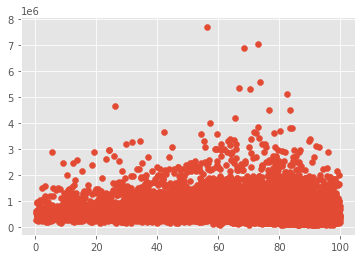

In [14]:
X = data['sqft_lawn_prct']
Y = data['price']

plt.scatter(X,Y)

In [16]:
def calc_slope(xs,ys):
    
    # Use the slope formula above and calculate the slope
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

calc_slope(X,Y)

-4059.520370647891

In [17]:
def best_fit(xs,ys):
    
    # use the slope function with intercept formula to return calculate slope and intercept from data points
    m = calc_slope(xs,ys)
    c = np.mean(ys) - m*np.mean(xs)
    
    return m, c

m, c = best_fit(X,Y)
m, c

(-4059.520370647891, 832823.1433782734)

In [18]:
def reg_line (m, c, xs):
    
    return [(m*x)+c for x in xs]

regression_line = reg_line(m,c,X)

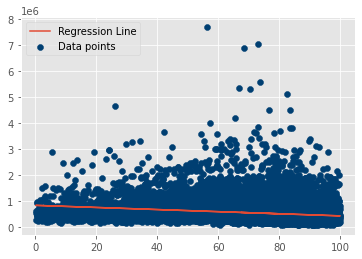

In [19]:
plt.scatter(X,Y,color='#003F72', label="Data points")
plt.plot(X, regression_line, label= "Regression Line")
plt.legend()

In [20]:
from sklearn.metrics import r2_score

r2_score(data['price'], data['sqft_lawn'])

-2.114045727899091

In [22]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data)

In [23]:
train

,id,price,sqft_living,sqft_lot,sqft_lawn,sqft_lawn_prct,zipcode,sqft_living15,sqft_lot15,sqft_lawn15,sqft_lawn15_prct
5680,8.035350e+09,510000.0,841.080622,869.847291,117.325862,76.18,98019.0,901.933718,874.561404,137.33142,69.89
6581,1.929300e+09,740000.0,841.080622,869.847291,800.000000,26.67,98109.0,901.933718,874.561404,137.33142,33.33
4981,3.625059e+09,790000.0,841.080622,869.847291,117.325862,85.18,98008.0,901.933718,874.561404,137.33142,86.18
5175,9.285800e+09,835000.0,841.080622,869.847291,117.325862,62.33,98126.0,901.933718,874.561404,137.33142,65.64
17480,7.431500e+09,959750.0,841.080622,869.847291,117.325862,93.88,98008.0,901.933718,874.561404,137.33142,83.07
...,...,...,...,...,...,...,...,...,...,...,...
1504,2.771602e+09,850000.0,841.080622,869.847291,117.325862,50.43,98119.0,901.933718,874.561404,137.33142,52.25
4618,9.136103e+09,626500.0,841.080622,869.847291,117.325862,49.84,98103.0,901.933718,874.561404,137.33142,55.76
5276,1.126059e+09,865000.0,841.080622,869.847291,117.325862,98.22,98072.0,901.933718,874.561404,137.33142,96.20
19328,5.745600e+09,359000.0,841.080622,869.847291,117.325862,80.90,98133.0,901.933718,874.561404,137.33142,78.97


In [ ]:
test

In [29]:
X_train = train.drop("sqft_lawn_prct", axis=1)
y_train = train["sqft_lawn_prct"]

X_test = test.drop("sqft_lawn_prct", axis=1)
y_test = test["sqft_lawn_prct"]

X_train

,id,price,sqft_living,sqft_lot,sqft_lawn,zipcode,sqft_living15,sqft_lot15,sqft_lawn15,sqft_lawn15_prct
5680,8.035350e+09,510000.0,841.080622,869.847291,117.325862,98019.0,901.933718,874.561404,137.33142,69.89
6581,1.929300e+09,740000.0,841.080622,869.847291,800.000000,98109.0,901.933718,874.561404,137.33142,33.33
4981,3.625059e+09,790000.0,841.080622,869.847291,117.325862,98008.0,901.933718,874.561404,137.33142,86.18
5175,9.285800e+09,835000.0,841.080622,869.847291,117.325862,98126.0,901.933718,874.561404,137.33142,65.64
17480,7.431500e+09,959750.0,841.080622,869.847291,117.325862,98008.0,901.933718,874.561404,137.33142,83.07
...,...,...,...,...,...,...,...,...,...,...
1504,2.771602e+09,850000.0,841.080622,869.847291,117.325862,98119.0,901.933718,874.561404,137.33142,52.25
4618,9.136103e+09,626500.0,841.080622,869.847291,117.325862,98103.0,901.933718,874.561404,137.33142,55.76
5276,1.126059e+09,865000.0,841.080622,869.847291,117.325862,98072.0,901.933718,874.561404,137.33142,96.20
19328,5.745600e+09,359000.0,841.080622,869.847291,117.325862,98133.0,901.933718,874.561404,137.33142,78.97


In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15492 entries, 5680 to 7718
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                15492 non-null  float64
 1   price             15492 non-null  float64
 2   sqft_living       15492 non-null  float64
 3   sqft_lot          15492 non-null  float64
 4   sqft_lawn         15492 non-null  float64
 5   zipcode           15492 non-null  float64
 6   sqft_living15     15492 non-null  float64
 7   sqft_lot15        15492 non-null  float64
 8   sqft_lawn15       15492 non-null  float64
 9   sqft_lawn15_prct  15492 non-null  float64
dtypes: float64(10)
memory usage: 1.3 MB


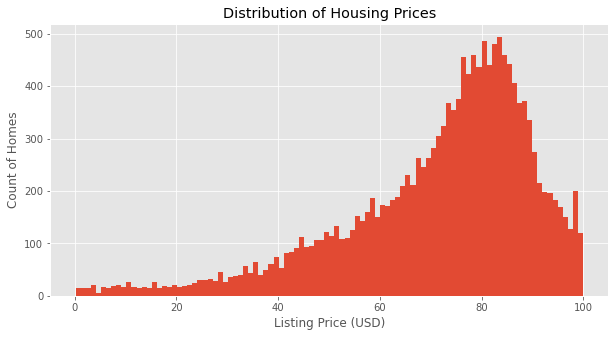

In [31]:

fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(y_train, bins=100)

ax.set_xlabel("Listing Price (USD)")
ax.set_ylabel("Count of Homes")
ax.set_title("Distribution of Housing Prices");

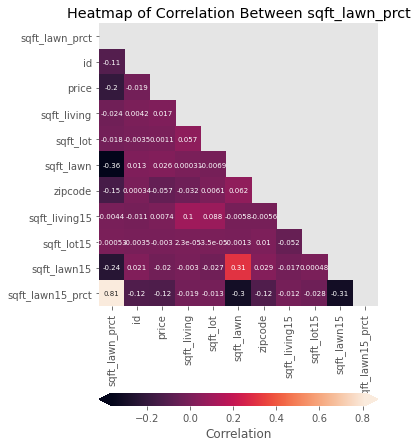

In [45]:
import seaborn as sns
import numpy as np

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(5, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    annot_kws={'size': 7},
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between sqft_lawn_prct");

In [33]:
most_correlated_feature = "sqft_lawn"

In [ ]:
# Run this cell without changes
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Listing Price");

In [ ]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [ ]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())